In [30]:
import pandas as pd
df = pd.read_csv("../data/processed data/processed_data.csv")
df.head()

,date,air_temperature_mean,dewpoint_mean,rltv_hum_mean,air_temperature_min,rltv_hum_min,air_temperature_max,prcp_count,mean_consumption,median_consumption,std_consumption,day,holiday
0,2011-11-23,5.925000,5.208333,95.250000,2.4,82.3,10.6,0,7.063833,6.2460,5.373299,2,0
1,2011-11-24,9.670833,8.041667,90.112500,6.1,74.5,13.6,2,8.426043,7.4890,6.219456,3,0
2,2011-11-25,10.541667,6.891667,78.779167,6.1,59.8,13.0,2,9.350267,8.7385,6.377867,4,0
3,2011-11-26,9.416667,6.333333,81.745833,4.3,66.9,12.9,0,10.255256,9.4770,6.689567,5,0
4,2011-11-27,9.904167,5.004167,73.425000,0.5,46.8,13.9,0,10.946154,9.8030,7.351755,6,0


In [31]:
cols = list(df.columns)

In [32]:
cols_to_move =['mean_consumption', 'median_consumption',
       'std_consumption']

for col in cols_to_move:
    cols.remove(col)
cols.extend(cols_to_move)  

df = df[cols]

In [34]:
df.to_csv("../data/processed data/processed_data.csv", index=False)

In [35]:
df['date'] = pd.to_datetime(df['date'])

# Data Preprocessing

In [36]:
import numpy as np

class CyclicDateEncoder:
    def __init__(self, date_column='date'):
        self.date_column = date_column

    def _cyclic_encode(self, values, max_value):
        """
        Generates sine and cosine encoding for cyclic values.
        """
        sin_values = np.sin(2 * np.pi * values / max_value)
        cos_values = np.cos(2 * np.pi * values / max_value)
        return sin_values, cos_values

    def add_cyclic_features(self, df):
        """
        Adds cyclic encoding columns for month, day of month, and day of week.
        """
        # Extract date parts
        df['day_of_month'] = df[self.date_column].dt.day
        df['month'] = df[self.date_column].dt.month
        df['day_of_week'] = df[self.date_column].dt.weekday

        # Cyclic encoding
        df['month_sin'], df['month_cos'] = self._cyclic_encode(df['month'], 12)
        df['day_of_week_sin'], df['day_of_week_cos'] = self._cyclic_encode(df['day_of_week'], 7)

        # Optionally, drop the intermediate columns if you only want sin/cos
        df.drop(columns=['month', 'day_of_month', 'day_of_week'], inplace=True)

        return df

encoder = CyclicDateEncoder(date_column='date')
df = encoder.add_cyclic_features(df)

df.head()

,date,air_temperature_mean,dewpoint_mean,rltv_hum_mean,air_temperature_min,rltv_hum_min,air_temperature_max,prcp_count,day,holiday,mean_consumption,median_consumption,std_consumption,month_sin,month_cos,day_of_week_sin,day_of_week_cos
0,2011-11-23,5.925000,5.208333,95.250000,2.4,82.3,10.6,0,2,0,7.063833,6.2460,5.373299,-0.5,0.866025,0.974928,-0.222521
1,2011-11-24,9.670833,8.041667,90.112500,6.1,74.5,13.6,2,3,0,8.426043,7.4890,6.219456,-0.5,0.866025,0.433884,-0.900969
2,2011-11-25,10.541667,6.891667,78.779167,6.1,59.8,13.0,2,4,0,9.350267,8.7385,6.377867,-0.5,0.866025,-0.433884,-0.900969
3,2011-11-26,9.416667,6.333333,81.745833,4.3,66.9,12.9,0,5,0,10.255256,9.4770,6.689567,-0.5,0.866025,-0.974928,-0.222521
4,2011-11-27,9.904167,5.004167,73.425000,0.5,46.8,13.9,0,6,0,10.946154,9.8030,7.351755,-0.5,0.866025,-0.781831,0.623490


In [37]:
drop_cols = ["day", "date"]
df.drop(columns=['date'], inplace=True)

In [38]:
df.columns

Index(['air_temperature_mean', 'dewpoint_mean', 'rltv_hum_mean',
       'air_temperature_min', 'rltv_hum_min', 'air_temperature_max',
       'prcp_count', 'day', 'holiday', 'mean_consumption',
       'median_consumption', 'std_consumption', 'month_sin', 'month_cos',
       'day_of_week_sin', 'day_of_week_cos'],
      dtype='object')

In [39]:
df.head()

,air_temperature_mean,dewpoint_mean,rltv_hum_mean,air_temperature_min,rltv_hum_min,air_temperature_max,prcp_count,day,holiday,mean_consumption,median_consumption,std_consumption,month_sin,month_cos,day_of_week_sin,day_of_week_cos
0,5.925000,5.208333,95.250000,2.4,82.3,10.6,0,2,0,7.063833,6.2460,5.373299,-0.5,0.866025,0.974928,-0.222521
1,9.670833,8.041667,90.112500,6.1,74.5,13.6,2,3,0,8.426043,7.4890,6.219456,-0.5,0.866025,0.433884,-0.900969
2,10.541667,6.891667,78.779167,6.1,59.8,13.0,2,4,0,9.350267,8.7385,6.377867,-0.5,0.866025,-0.433884,-0.900969
3,9.416667,6.333333,81.745833,4.3,66.9,12.9,0,5,0,10.255256,9.4770,6.689567,-0.5,0.866025,-0.974928,-0.222521
4,9.904167,5.004167,73.425000,0.5,46.8,13.9,0,6,0,10.946154,9.8030,7.351755,-0.5,0.866025,-0.781831,0.623490


In [40]:
# extracting the features only
features = ['air_temperature_mean', 'dewpoint_mean', 'rltv_hum_mean',
       'air_temperature_min', 'rltv_hum_min', 'air_temperature_max',
       'prcp_count', 'holiday', 'month_sin',
       'month_cos', 'day_of_week_sin', 'day_of_week_cos']
features_df = df[features]
features_df.head(3)

,air_temperature_mean,dewpoint_mean,rltv_hum_mean,air_temperature_min,rltv_hum_min,air_temperature_max,prcp_count,holiday,month_sin,month_cos,day_of_week_sin,day_of_week_cos
0,5.925000,5.208333,95.250000,2.4,82.3,10.6,0,0,-0.5,0.866025,0.974928,-0.222521
1,9.670833,8.041667,90.112500,6.1,74.5,13.6,2,0,-0.5,0.866025,0.433884,-0.900969
2,10.541667,6.891667,78.779167,6.1,59.8,13.0,2,0,-0.5,0.866025,-0.433884,-0.900969


In [41]:
# extracting the targets
target = ['mean_consumption', 'median_consumption',
       'std_consumption']
target_df = df[target]
target_df.head(3)

,mean_consumption,median_consumption,std_consumption
0,7.063833,6.2460,5.373299
1,8.426043,7.4890,6.219456
2,9.350267,8.7385,6.377867


In [42]:
len(target_df), len(features_df)

(827, 827)

In [43]:
# experiment with one target only
one_target_df= target_df["mean_consumption"]

# Model Training

In [26]:
# 1. XGBOOST model

In [27]:
!pip install xgboost


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score

In [44]:
X_train, X_test, y_train, y_test = train_test_split(features_df, one_target_df, test_size=0.2)

In [45]:
def check_model(model, X_train=X_train, y_train=y_train, X_test = X_test, y_test = y_test, features= features_df, target=one_target_df, cv=5, return_model=False):
    cv_scores = cross_val_score(model, features_df, target, cv=5, scoring='neg_mean_squared_error')
    print("Cross-validation scores (negative MSE):", cv_scores)
    print("Mean MSE across all folds:", -cv_scores.mean())
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(f"The r-squared value for the prediction is: {r2_score(y_test, prediction)}")
    plt.scatter(y_test, prediction)
    plt.xlabel("actual")
    plt.ylabel("prediction")
    plt.grid(alpha=0.1)
    plt.xlim((5,15))
    plt.ylim(5,15)
    plt.show();
    if return_model:
        return model

Cross-validation scores (negative MSE): [-1.43922743 -0.13707026 -0.58527141 -0.22261886 -0.44086475]
Mean MSE across all folds: 0.5650105392493204
The r-squared value for the prediction is: 0.8846447516563527


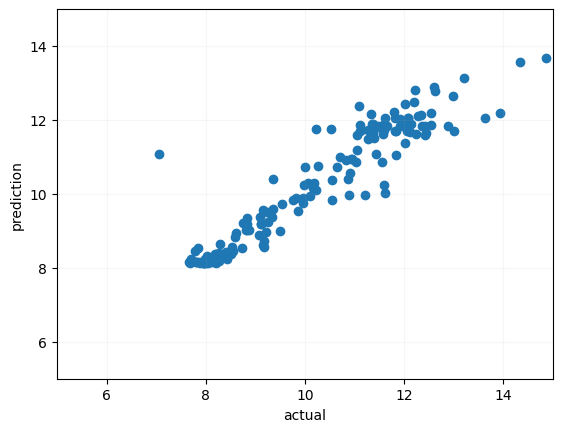

In [46]:
model = XGBRegressor(eta = 0.1, gamma = 4)
XGB_trained = check_model(model=model, cv=5, return_model=True)

In [ ]:
# Linear Regression

Cross-validation scores (negative MSE): [-1.24013336 -0.21589654 -0.27645183 -0.51016864 -0.56284112]
Mean MSE across all folds: 0.5610982980130553
The r-squared value for the prediction is: 0.8615936707309855


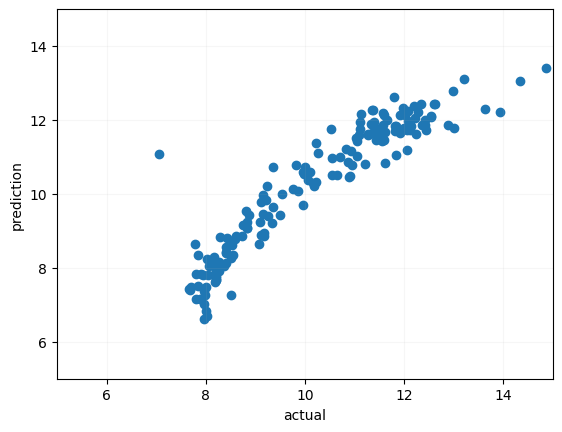

In [47]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

lr_model_trained = check_model(model=lr_model, return_model=True)

In [ ]:
# Polynomial Regression

In [49]:
from sklearn.preprocessing import PolynomialFeatures


Cross-validation scores (negative MSE): [-1.24013336 -0.21589654 -0.27645183 -0.51016864 -0.56284112]
Mean MSE across all folds: 0.5610982980130553
The r-squared value for the prediction is: 0.7289747543167131


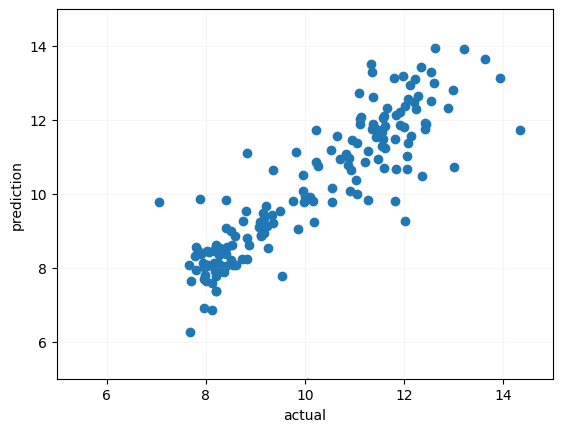

In [65]:
lr2_model = LinearRegression()
pr_model = PolynomialFeatures(degree=3)
X_train_poly = pr_model.fit_transform(X_train)
features_poly = pr_model.fit_transform(features_df)
X_test_poly = pr_model.fit_transform(X_test)
lr2_model = LinearRegression()
poly_model = check_model(model=lr2_model, X_train=X_train_poly, X_test=X_test_poly, features=features_poly, return_model=True)

In [68]:
# Train on multiple output
from sklearn.multioutput import MultiOutputRegressor

In [73]:
X_train, X_test, y_train, y_test = train_test_split(features_df, target_df, test_size=0.2)

In [72]:
y_train

,mean_consumption,median_consumption,std_consumption
280,8.259175,6.8130,6.331898
573,8.209851,6.7240,6.396040
137,10.564902,8.0340,8.872111
274,7.767787,6.4485,5.783997
144,11.079492,8.7500,8.851962
...,...,...,...
32,12.891681,9.8140,11.240834
762,11.969168,9.2020,10.709043
549,9.087807,7.2020,7.581617
142,9.986319,7.6720,8.329982


In [69]:
xgb = XGBRegressor()
multioutput_model = MultiOutputRegressor(xgb)

Cross-validation scores (negative MSE): [-1.20525908 -0.12443735 -0.97836608 -0.14343955 -0.4909068 ]
Mean MSE across all folds: 0.5884817734360694
The r-squared value for the prediction is: 0.9108953475952148


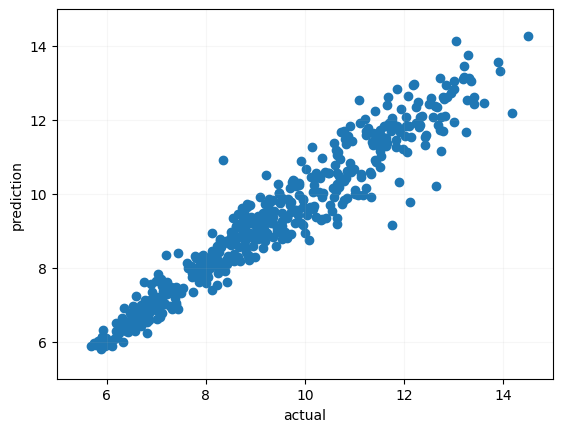

In [75]:
multioutput_model= check_model(model=multioutput_model, X_train=X_train, y_train=y_train, X_test = X_test, y_test = y_test, features= features_df, target=target_df, cv=5, return_model=True )

# Conclusion

In [51]:
# All the models pereformed well on baseline, and with proper tuning,  XGBOOST turned out to be the highest performer

In [52]:
# Visualizing the prediction by different models

In [53]:
df = pd.read_csv("../data/processed data/processed_data.csv")
df["date"] = pd.to_datetime(df["date"])
df = encoder.add_cyclic_features(df)


In [54]:
# XGBOOST

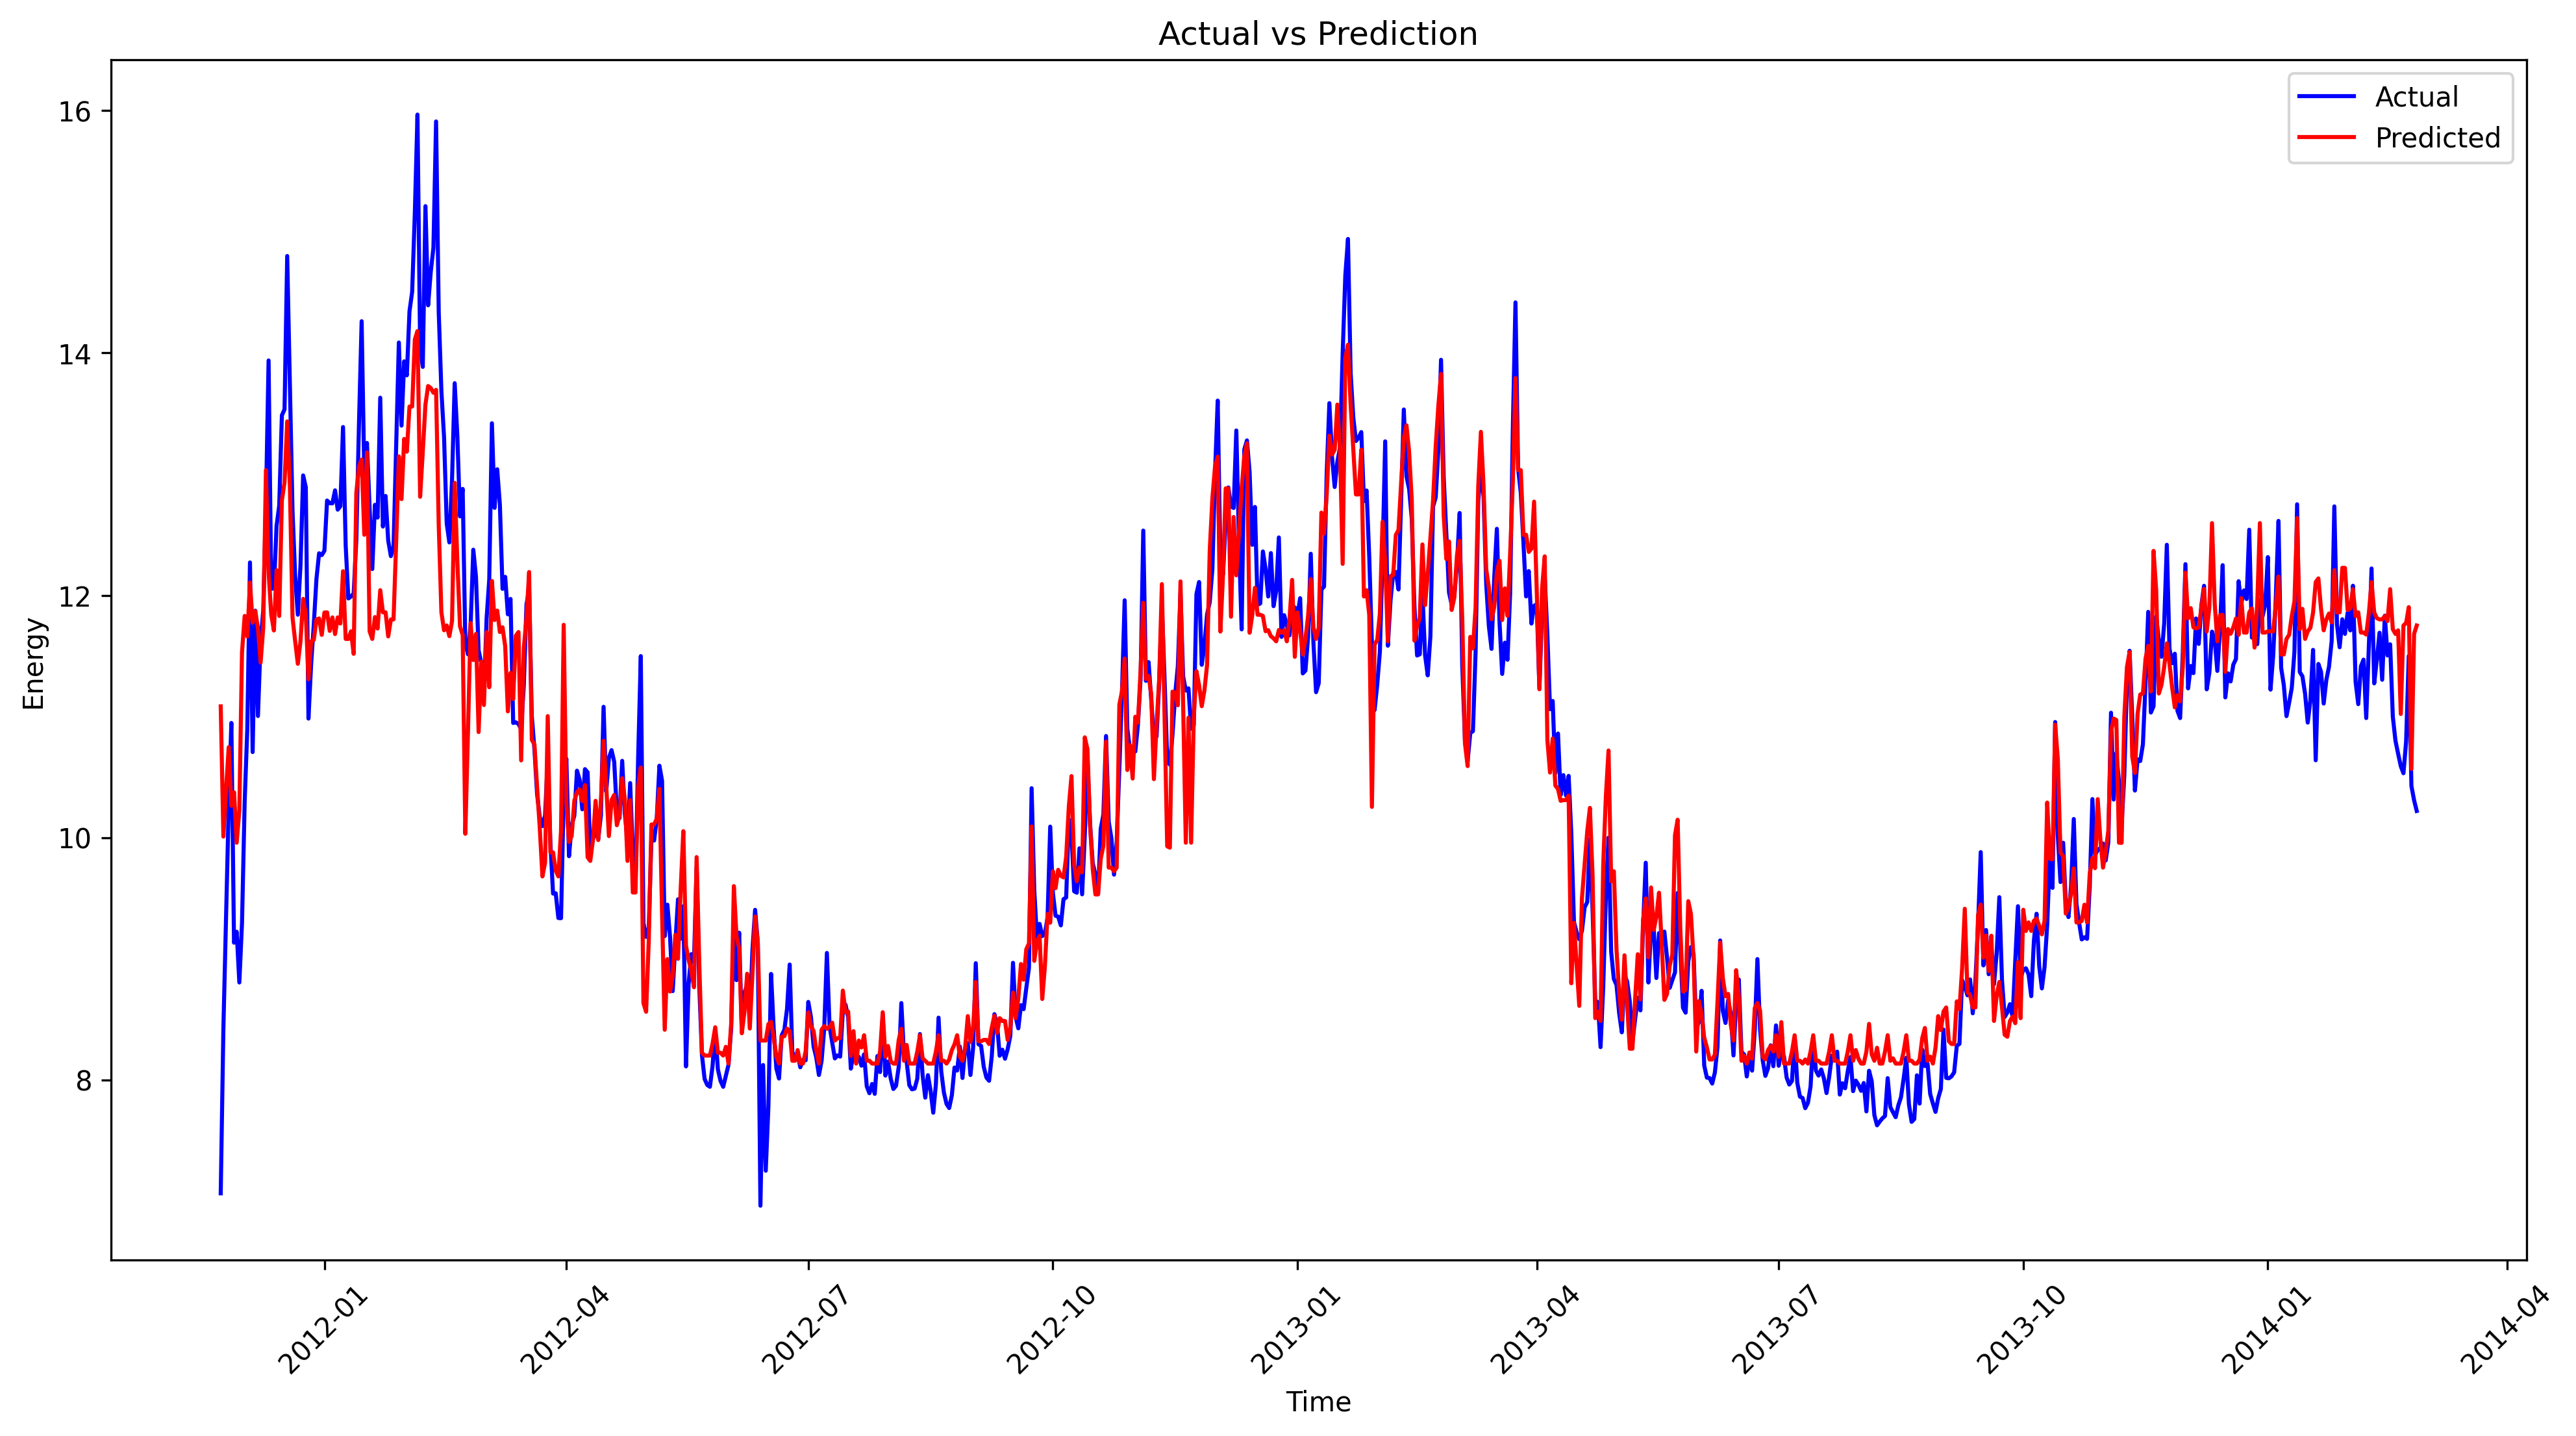

In [55]:
# Visulaizing energy forcasting using the trained models
def visualize_prediction(features, label, model, df=df):
    predictions = model.predict(features)
    plt.figure(figsize=(16,8), dpi = 300)
    plt.plot(df["date"],df["mean_consumption"], color="blue", label = "Actual")
    plt.plot(df["date"], predictions, color = "red", label = "Predicted")
    plt.legend()
    plt.xticks(rotation=45)
    plt.title("Actual vs Prediction")
    plt.xlabel("Time")
    plt.ylabel("Energy")

visualize_prediction(df = df, features=features_df, label=one_target_df, model=XGB_trained)


In [56]:
# Linear Regression

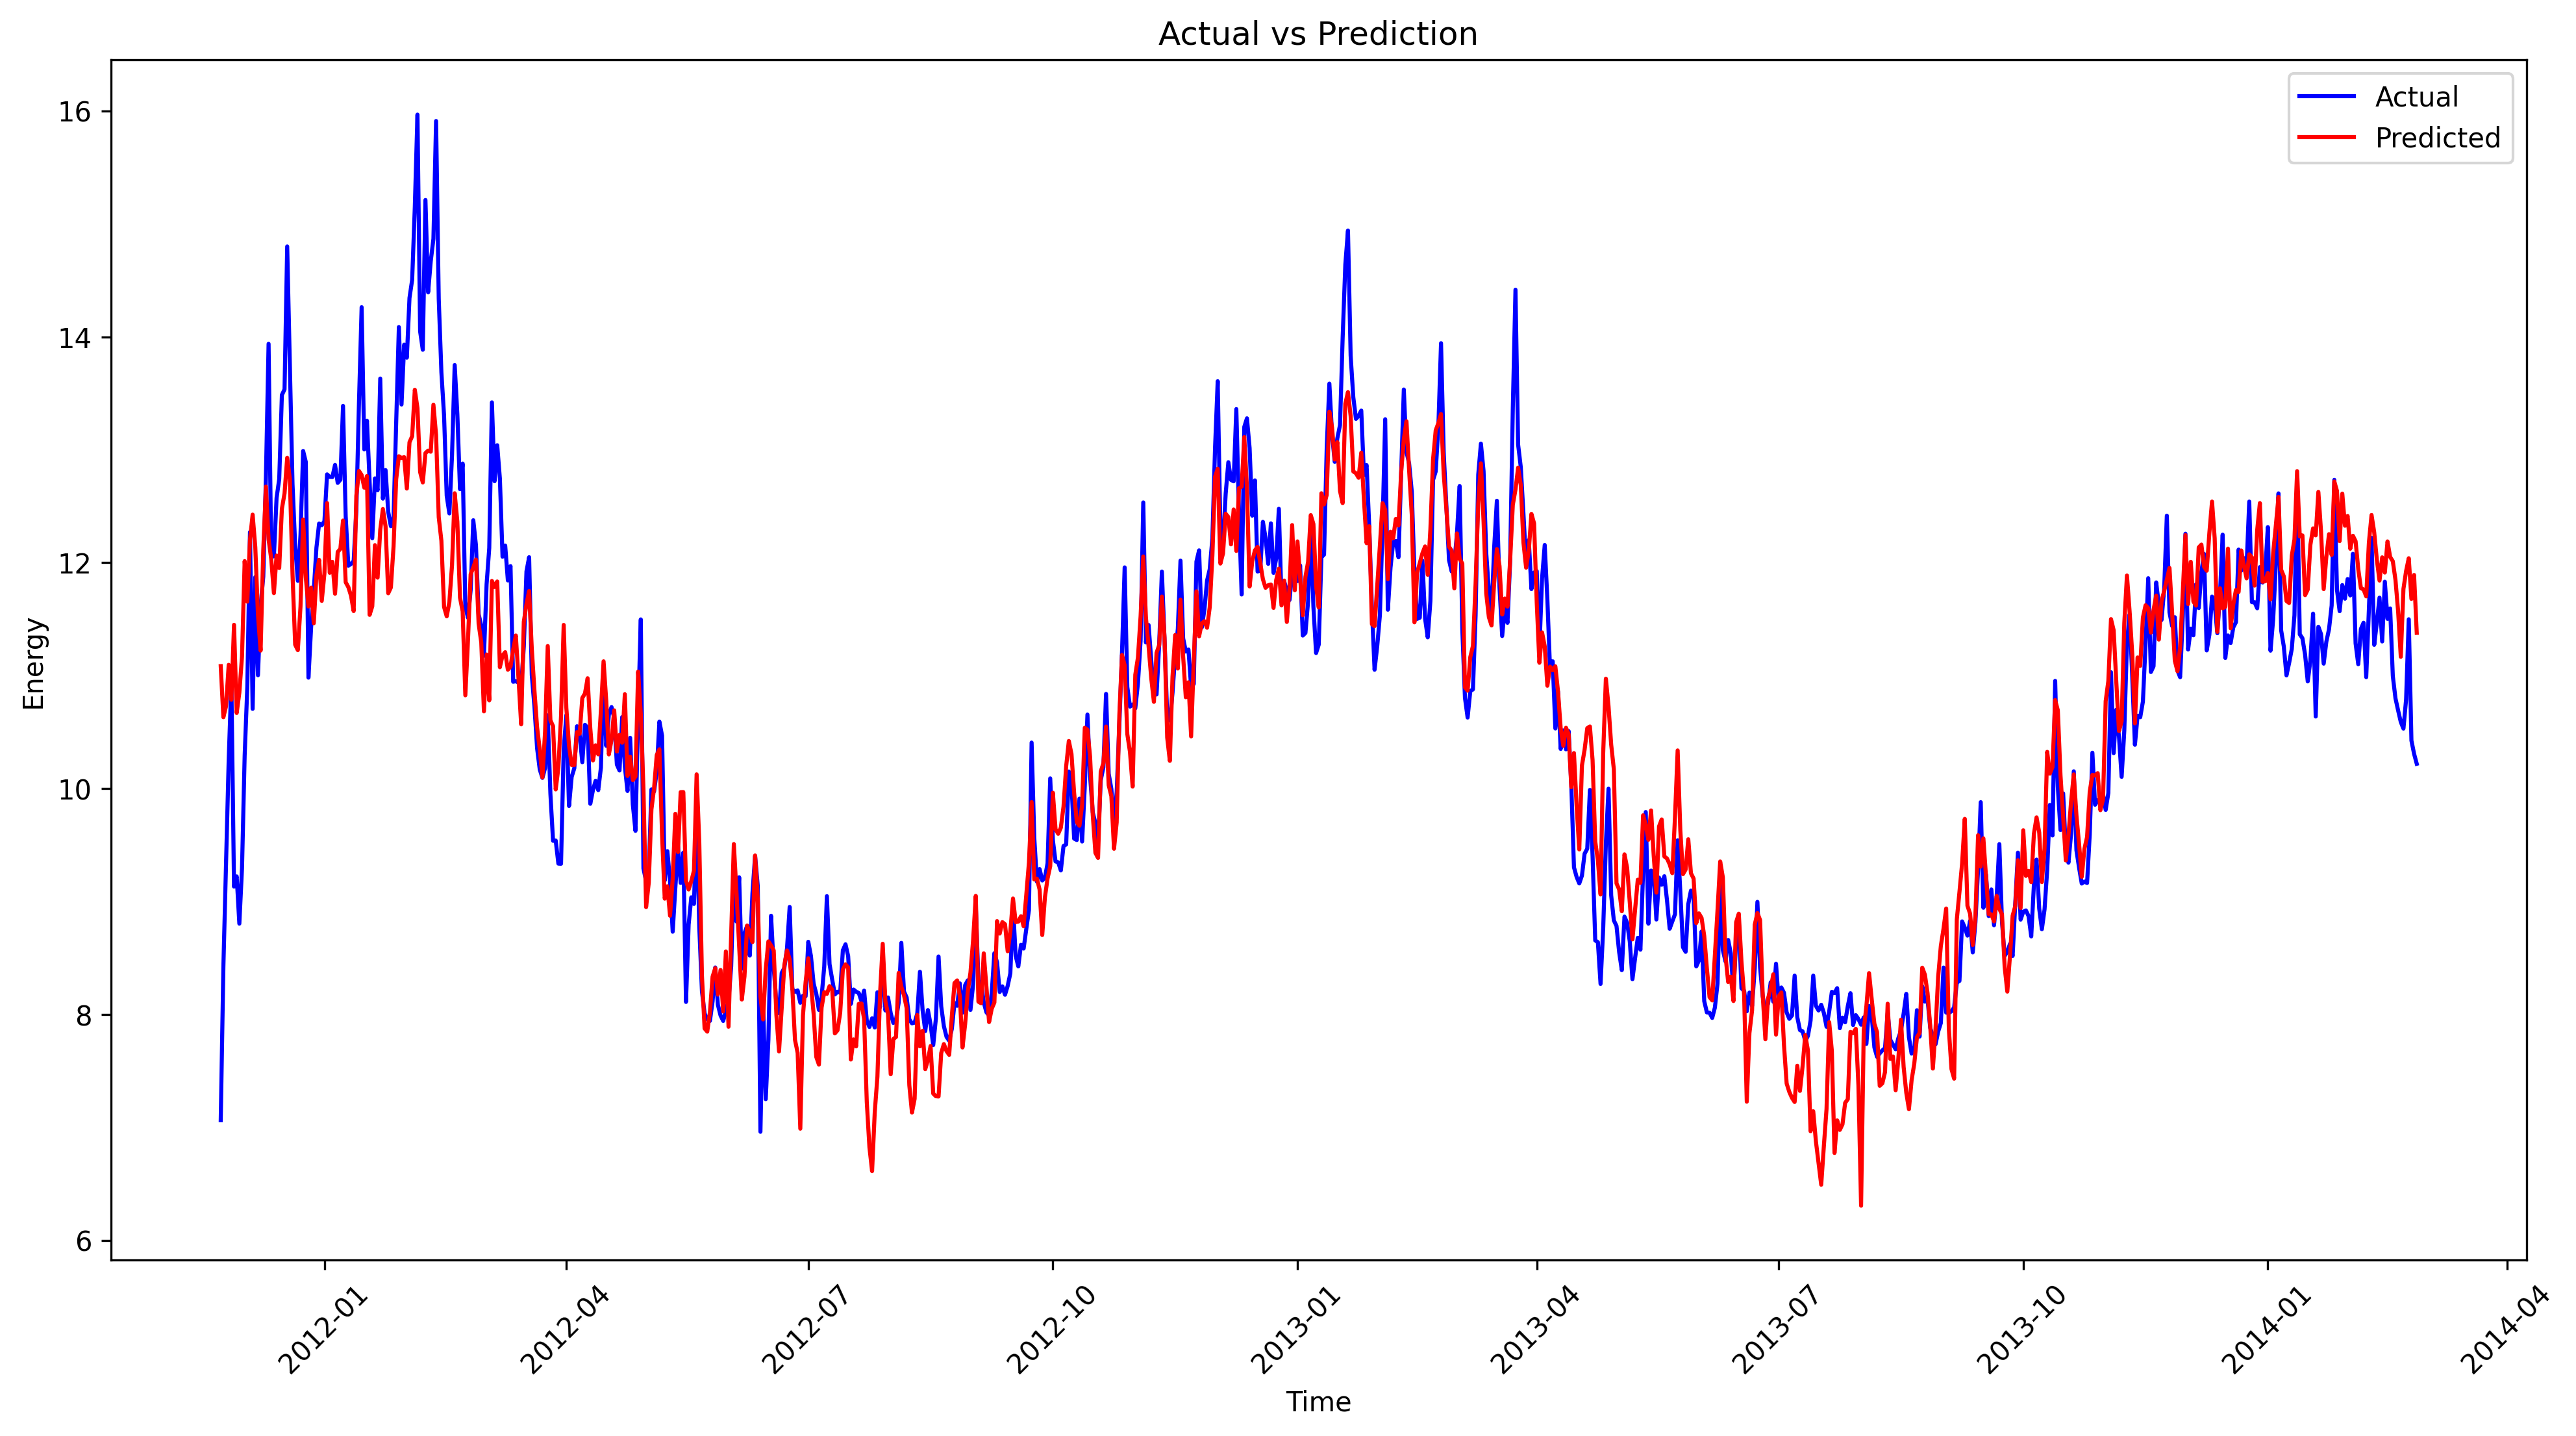

In [57]:
visualize_prediction(features=features_df, label=one_target_df, model=lr_model_trained)

In [58]:
# Polynomial Regression

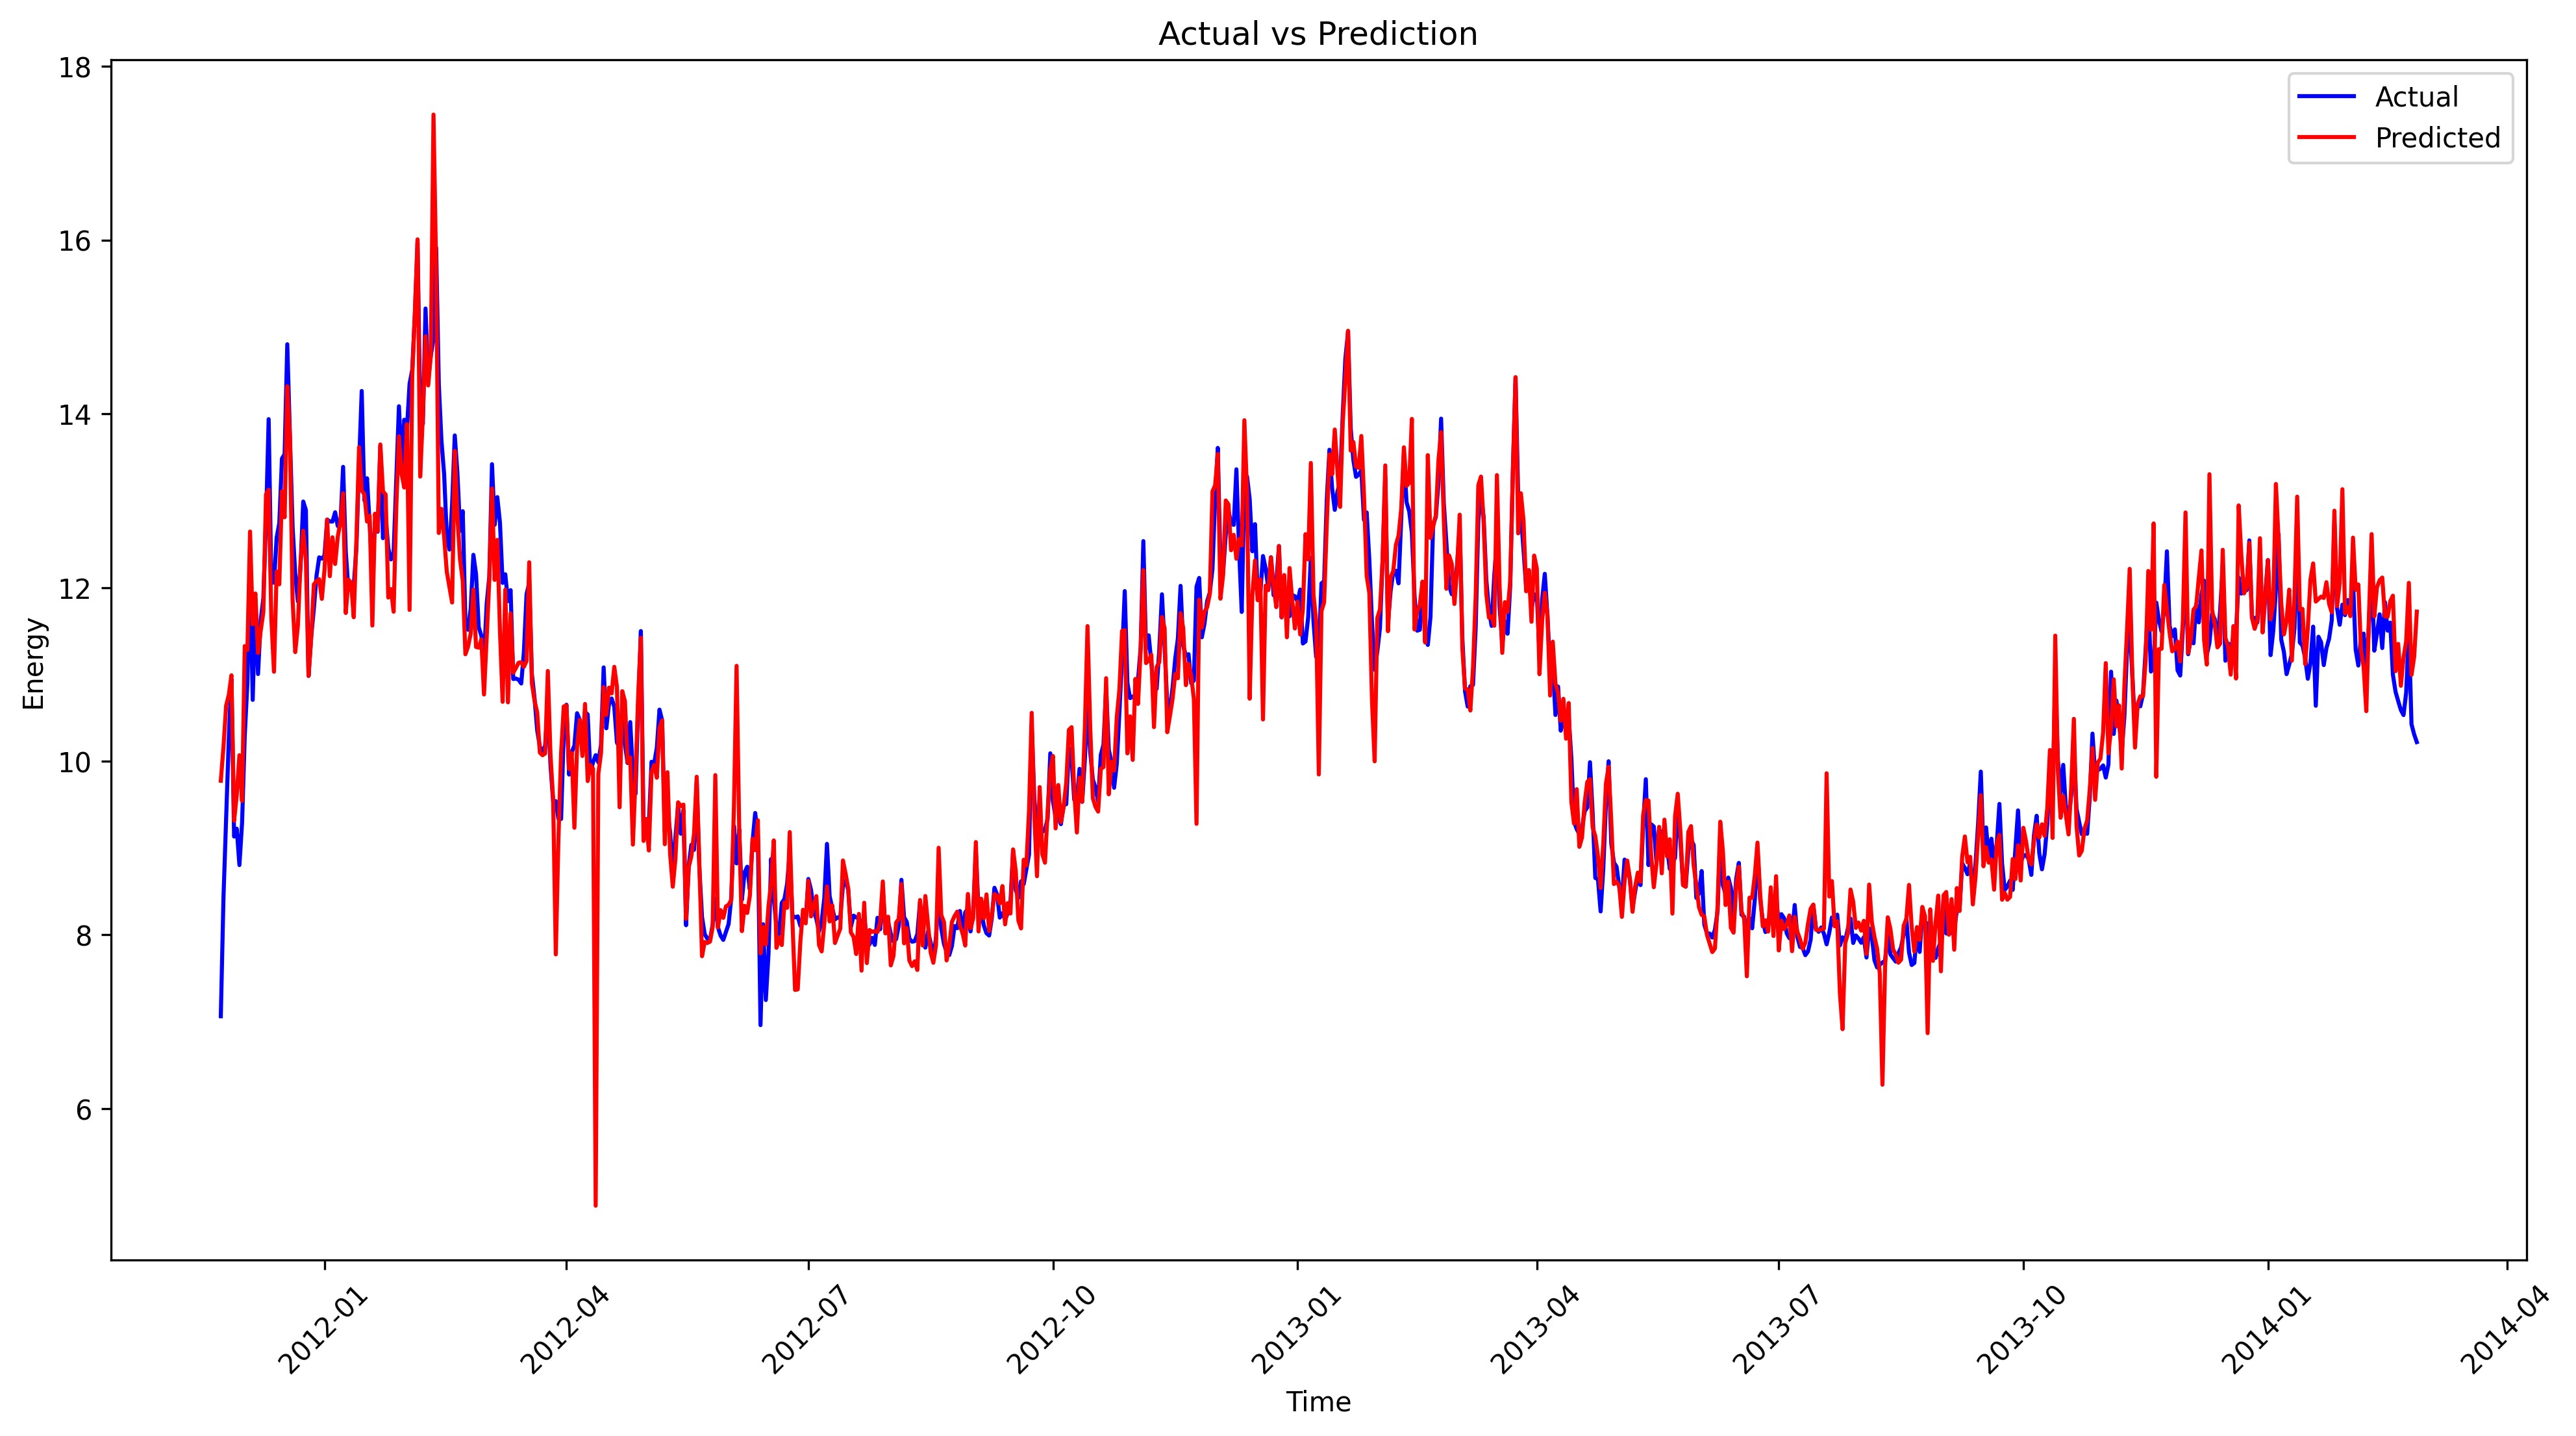

In [66]:
visualize_prediction(features=features_poly, label=one_target_df, model=poly_model)